As described in readme, a brain was trained on single sku over wide range of uncertainties. Exported brain was used along mixed integer solver to balanace purcase orders for 200 skus with different forecasts and uncertainties. Total inventory level of 5000 was imposed for all the skus.  

## Anslysis: 200 skus with missed sale to inventory cost ratio = 1000 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# filename1 = '2022-06-14-18-15-10_exported_log_r1000.csv'
# filename2 = '2022-06-14-18-15-19_zero_policy_log_r1000.csv'
# filename3 = '2022-06-14-18-15-02_random_safety_policy_log_r1000.csv'
filename1 = '2022-08-31-14-31-12_exported_log.csv'
filename2 = '2022-08-31-14-38-51_zero_policy_log.csv'
filename3 = '2022-08-31-14-49-16_random_safety_policy_log.csv'
files = [filename1, filename2, filename3]
solvers = ["brainplusmip", 'mipmix', 'randomsafety']
ddf = pd.DataFrame(columns = ['filename', 'solver', 'sigmax', 'cost_mean', 'cost_std', 'cost_ratio'])
for file,solver in zip(files, solvers):
    df_temp = pd.read_csv(file)
    df_temp = df_temp[df_temp["iteration"]>10]
    for sigmax in range(1, 10):
        df_temp_sig = df_temp[df_temp["sigmax"]==sigmax]
        temp_dict = {}
        temp_dict['filename'] = file
        temp_dict['sigmax'] = sigmax
        temp_dict['cost_ratio'] = 100
        temp_dict['solver'] = solver 
        df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
        temp_dict['cost_mean'] = df_temp_sig.iter_cost_abs.mean()
        temp_dict['cost_std'] = df_temp_sig.iter_cost_abs.sem()
        print(temp_dict)
        ddf = ddf.append(temp_dict, ignore_index = True)
        print(ddf)


C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_23296/107182172.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']


{'filename': '2022-08-31-14-31-12_exported_log.csv', 'sigmax': 1, 'cost_ratio': 100, 'solver': 'brainplusmip', 'cost_mean': 314.19099090909094, 'cost_std': 6.436442189375547}
                               filename        solver sigmax   cost_mean  \
0  2022-08-31-14-31-12_exported_log.csv  brainplusmip      1  314.190991   

   cost_std cost_ratio  
0  6.436442        100  
{'filename': '2022-08-31-14-31-12_exported_log.csv', 'sigmax': 2, 'cost_ratio': 100, 'solver': 'brainplusmip', 'cost_mean': nan, 'cost_std': nan}
                               filename        solver sigmax   cost_mean  \
0  2022-08-31-14-31-12_exported_log.csv  brainplusmip      1  314.190991   
1  2022-08-31-14-31-12_exported_log.csv  brainplusmip      2         NaN   

   cost_std cost_ratio  
0  6.436442        100  
1       NaN        100  
{'filename': '2022-08-31-14-31-12_exported_log.csv', 'sigmax': 3, 'cost_ratio': 100, 'solver': 'brainplusmip', 'cost_mean': nan, 'cost_std': nan}
                          

                                            filename        solver sigmax  \
0               2022-08-31-14-31-12_exported_log.csv  brainplusmip      1   
1               2022-08-31-14-31-12_exported_log.csv  brainplusmip      2   
2               2022-08-31-14-31-12_exported_log.csv  brainplusmip      3   
3               2022-08-31-14-31-12_exported_log.csv  brainplusmip      4   
4               2022-08-31-14-31-12_exported_log.csv  brainplusmip      5   
5               2022-08-31-14-31-12_exported_log.csv  brainplusmip      6   
6               2022-08-31-14-31-12_exported_log.csv  brainplusmip      7   
7               2022-08-31-14-31-12_exported_log.csv  brainplusmip      8   
8               2022-08-31-14-31-12_exported_log.csv  brainplusmip      9   
9            2022-08-31-14-38-51_zero_policy_log.csv        mipmix      1   
10           2022-08-31-14-38-51_zero_policy_log.csv        mipmix      2   
11           2022-08-31-14-38-51_zero_policy_log.csv        mipmix      3   

C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_23296/107182172.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_23296/107182172.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']


In [8]:
df_brain = ddf[ddf['solver']=='brainplusmip']
df_mipmix = ddf[ddf['solver']=='mipmix']
df_randomsafety = ddf[ddf['solver']=='randomsafety']

In [10]:
df_brain

,filename,solver,sigmax,cost_mean,cost_std,cost_ratio
0,2022-08-31-14-31-12_exported_log.csv,brainplusmip,1,314.190991,6.436442,100
1,2022-08-31-14-31-12_exported_log.csv,brainplusmip,2,NaN,NaN,100
2,2022-08-31-14-31-12_exported_log.csv,brainplusmip,3,NaN,NaN,100
3,2022-08-31-14-31-12_exported_log.csv,brainplusmip,4,NaN,NaN,100
4,2022-08-31-14-31-12_exported_log.csv,brainplusmip,5,NaN,NaN,100
5,2022-08-31-14-31-12_exported_log.csv,brainplusmip,6,NaN,NaN,100
6,2022-08-31-14-31-12_exported_log.csv,brainplusmip,7,NaN,NaN,100
7,2022-08-31-14-31-12_exported_log.csv,brainplusmip,8,NaN,NaN,100
8,2022-08-31-14-31-12_exported_log.csv,brainplusmip,9,NaN,NaN,100


In [11]:
df_mipmix

,filename,solver,sigmax,cost_mean,cost_std,cost_ratio
9,2022-08-31-14-38-51_zero_policy_log.csv,mipmix,1,NaN,NaN,100
10,2022-08-31-14-38-51_zero_policy_log.csv,mipmix,2,NaN,NaN,100
11,2022-08-31-14-38-51_zero_policy_log.csv,mipmix,3,NaN,NaN,100
12,2022-08-31-14-38-51_zero_policy_log.csv,mipmix,4,NaN,NaN,100
13,2022-08-31-14-38-51_zero_policy_log.csv,mipmix,5,NaN,NaN,100
14,2022-08-31-14-38-51_zero_policy_log.csv,mipmix,6,NaN,NaN,100
15,2022-08-31-14-38-51_zero_policy_log.csv,mipmix,7,NaN,NaN,100
16,2022-08-31-14-38-51_zero_policy_log.csv,mipmix,8,NaN,NaN,100
17,2022-08-31-14-38-51_zero_policy_log.csv,mipmix,9,NaN,NaN,100


In [12]:
df_randomsafety

,filename,solver,sigmax,cost_mean,cost_std,cost_ratio
18,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,1,NaN,NaN,100
19,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,2,12.829055,2.502585,100
20,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,3,NaN,NaN,100
21,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,4,NaN,NaN,100
22,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,5,NaN,NaN,100
23,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,6,NaN,NaN,100
24,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,7,NaN,NaN,100
25,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,8,NaN,NaN,100
26,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,9,31.627682,4.514603,100


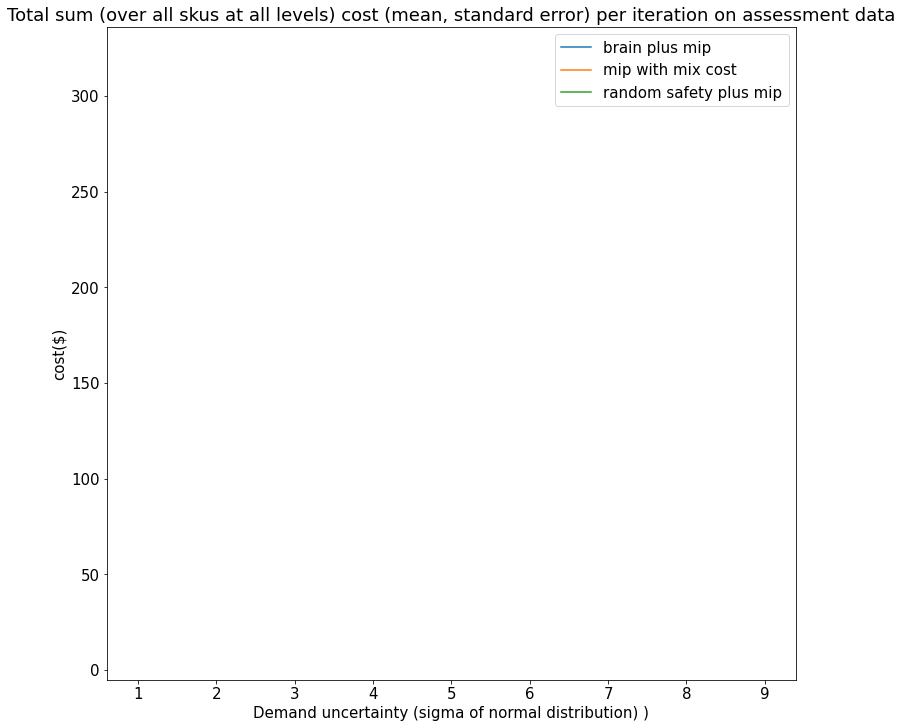

In [9]:
plt.rc('font', size=15)
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
mean_cost = df_brain.cost_mean
std_cost = df_brain.cost_std
sigmax = df_brain["sigmax"]
#print(sigmax)
#np.arange(len(mean_cost))
ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost, 
                alpha=0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='brain plus mip')
ax0.set_ylabel('cost($)',fontsize=15)
ax0.set_xlabel('Demand uncertainty (sigma of normal distribution) )', fontsize=15)
ax0.set_title('Total sum (over all skus at all levels) cost (mean, standard error) per iteration on assessment data', fontsize=18)
ax0.legend()


mean_cost = df_mipmix.cost_mean
std_cost = df_mipmix.cost_std
sigmax = df_mipmix["sigmax"]

ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost,
                alpha = 0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='mip with mix cost')
ax0.legend()


mean_cost = df_randomsafety.cost_mean
std_cost = df_randomsafety.cost_std
sigmax = df_randomsafety["sigmax"]

ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost,
                alpha = 0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='random safety plus mip')
ax0.legend()

## Anslysis: 200 skus with missed sale to inventory cost ratio = 100 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from tabulate import tabulate 
from matplotlib import pyplot as plt

In [15]:
# filename1 = '2022-06-17-21-52-06_exported_log_r100.csv'
# filename2 = '2022-06-17-21-52-44_zero_policy_log_r100.csv'
# filename3 = '2022-06-17-21-51-58_random_safety_policy_log_r100.csv'
filename1 = '2022-08-31-14-31-12_exported_log.csv'
filename2 = '2022-08-31-14-38-51_zero_policy_log.csv'
filename3 = '2022-08-31-14-49-16_random_safety_policy_log.csv'
files = [filename1, filename2, filename3]

In [16]:
files = [filename1, filename2, filename3]
solvers = ["brainplusmip", 'mipmix', 'randomsafety']
ddf = pd.DataFrame(columns = ['filename', 'solver', 'sigmax', 'cost_mean', 'cost_std', 'cost_ratio'])
for file,solver in zip(files, solvers):
    df_temp = pd.read_csv(file)
    df_temp = df_temp[df_temp["iteration"]>10]
    for sigmax in range(1, 10):
        df_temp_sig = df_temp[df_temp["sigmax"]==sigmax]
        temp_dict = {}
        temp_dict['filename'] = file
        temp_dict['sigmax'] = sigmax
        temp_dict['cost_ratio'] = 100
        temp_dict['solver'] = solver 
        df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
        temp_dict['cost_mean'] = df_temp_sig.iter_cost_abs.mean()
        temp_dict['cost_std'] = df_temp_sig.iter_cost_abs.sem()
        print(temp_dict)
        ddf = ddf.append(temp_dict, ignore_index = True)
        print(ddf)

C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_23296/3653354540.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']


{'filename': '2022-08-31-14-31-12_exported_log.csv', 'sigmax': 1, 'cost_ratio': 100, 'solver': 'brainplusmip', 'cost_mean': 314.19099090909094, 'cost_std': 6.436442189375547}
                               filename        solver sigmax   cost_mean  \
0  2022-08-31-14-31-12_exported_log.csv  brainplusmip      1  314.190991   

   cost_std cost_ratio  
0  6.436442        100  
{'filename': '2022-08-31-14-31-12_exported_log.csv', 'sigmax': 2, 'cost_ratio': 100, 'solver': 'brainplusmip', 'cost_mean': nan, 'cost_std': nan}
                               filename        solver sigmax   cost_mean  \
0  2022-08-31-14-31-12_exported_log.csv  brainplusmip      1  314.190991   
1  2022-08-31-14-31-12_exported_log.csv  brainplusmip      2         NaN   

   cost_std cost_ratio  
0  6.436442        100  
1       NaN        100  
{'filename': '2022-08-31-14-31-12_exported_log.csv', 'sigmax': 3, 'cost_ratio': 100, 'solver': 'brainplusmip', 'cost_mean': nan, 'cost_std': nan}
                          

                                            filename        solver sigmax  \
0               2022-08-31-14-31-12_exported_log.csv  brainplusmip      1   
1               2022-08-31-14-31-12_exported_log.csv  brainplusmip      2   
2               2022-08-31-14-31-12_exported_log.csv  brainplusmip      3   
3               2022-08-31-14-31-12_exported_log.csv  brainplusmip      4   
4               2022-08-31-14-31-12_exported_log.csv  brainplusmip      5   
5               2022-08-31-14-31-12_exported_log.csv  brainplusmip      6   
6               2022-08-31-14-31-12_exported_log.csv  brainplusmip      7   
7               2022-08-31-14-31-12_exported_log.csv  brainplusmip      8   
8               2022-08-31-14-31-12_exported_log.csv  brainplusmip      9   
9            2022-08-31-14-38-51_zero_policy_log.csv        mipmix      1   
10           2022-08-31-14-38-51_zero_policy_log.csv        mipmix      2   
11           2022-08-31-14-38-51_zero_policy_log.csv        mipmix      3   

C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_23296/3653354540.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_23296/3653354540.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']


In [17]:
df_brain = ddf[ddf['solver']=='brainplusmip']
df_mipmix = ddf[ddf['solver']=='mipmix']
df_randomsafety = ddf[ddf['solver']=='randomsafety']

In [21]:
df_randomsafety

,filename,solver,sigmax,cost_mean,cost_std,cost_ratio
18,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,1,NaN,NaN,100
19,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,2,12.829055,2.502585,100
20,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,3,NaN,NaN,100
21,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,4,NaN,NaN,100
22,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,5,NaN,NaN,100
23,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,6,NaN,NaN,100
24,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,7,NaN,NaN,100
25,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,8,NaN,NaN,100
26,2022-08-31-14-49-16_random_safety_policy_log.csv,randomsafety,9,31.627682,4.514603,100


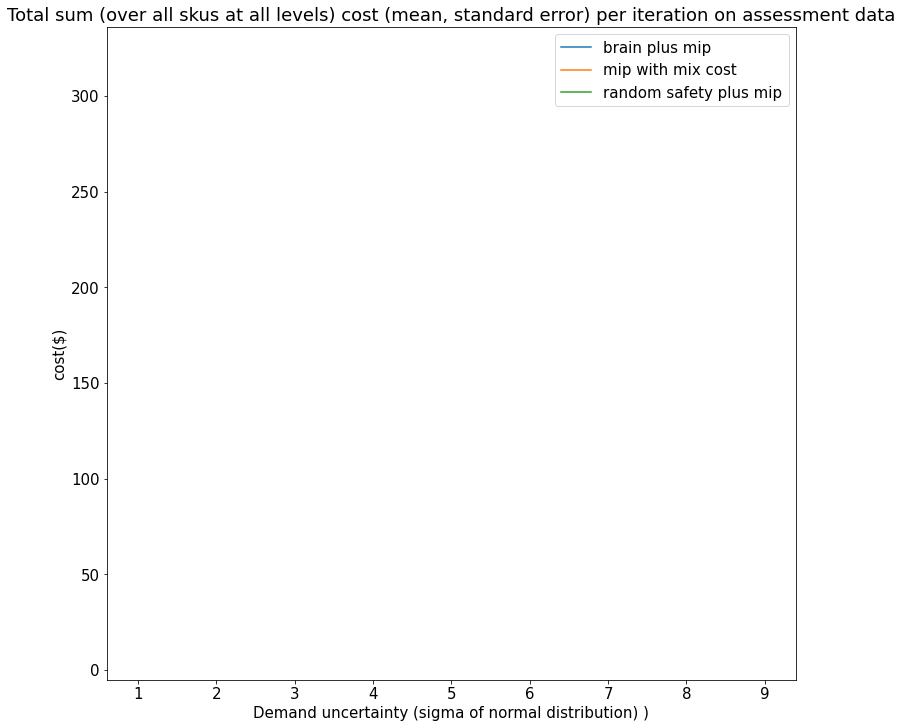

In [18]:
plt.rc('font', size=15)
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
mean_cost = df_brain.cost_mean
std_cost = df_brain.cost_std
sigmax = df_brain["sigmax"]
#print(sigmax)
#np.arange(len(mean_cost))
ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost, 
                alpha=0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='brain plus mip')
ax0.set_ylabel('cost($)',fontsize=15)
ax0.set_xlabel('Demand uncertainty (sigma of normal distribution) )', fontsize=15)
ax0.set_title('Total sum (over all skus at all levels) cost (mean, standard error) per iteration on assessment data', fontsize=18)
ax0.legend()


mean_cost = df_mipmix.cost_mean
std_cost = df_mipmix.cost_std
sigmax = df_mipmix["sigmax"]

ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost,
                alpha = 0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='mip with mix cost')
ax0.legend()


mean_cost = df_randomsafety.cost_mean
std_cost = df_randomsafety.cost_std
sigmax = df_randomsafety["sigmax"]

ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost,
                alpha = 0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='random safety plus mip')
ax0.legend()

## Anslysis: 200 skus with missed sale to inventory cost ratio = 10 


In [19]:
filename1 = '2022-06-12-18-46-27_exported_log_10.csv'
filename2 = '2022-06-12-18-47-54_zero_policy_log_r10.csv'
filename3 = '2022-06-12-18-47-06_random_safety_policy_log_r10.csv'
files = [filename1, filename2, filename3]
solvers = ["brainplusmip", 'mipmix', 'randomsafety']
ddf = pd.DataFrame(columns = ['filename', 'solver', 'sigmax', 'cost_mean', 'cost_std', 'cost_ratio'])
for file,solver in zip(files, solvers):
    df_temp = pd.read_csv(file)
    df_temp = df_temp[df_temp["iteration"]>10]
    for sigmax in range(1, 10):
        df_temp_sig = df_temp[df_temp["sigmax"]==sigmax]
        temp_dict = {}
        temp_dict['filename'] = file
        temp_dict['sigmax'] = sigmax
        temp_dict['cost_ratio'] = 10
        temp_dict['solver'] = solver 
        df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
        temp_dict['cost_mean'] = df_temp_sig.iter_cost_abs.mean()
        temp_dict['cost_std'] = df_temp_sig.iter_cost_abs.sem()
        print(temp_dict)
        ddf = ddf.append(temp_dict, ignore_index = True)
        print(ddf)

C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_24600/1969158187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_24600/1969158187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_24600/1969158187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

{'filename': '2022-06-12-18-46-27_exported_log_10.csv', 'sigmax': 1, 'cost_ratio': 10, 'solver': 'brainplusmip', 'cost_mean': 93.00194736842104, 'cost_std': 0.5290214620122051}
                                  filename        solver sigmax  cost_mean  \
0  2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      1  93.001947   

   cost_std cost_ratio  
0  0.529021         10  
{'filename': '2022-06-12-18-46-27_exported_log_10.csv', 'sigmax': 2, 'cost_ratio': 10, 'solver': 'brainplusmip', 'cost_mean': 214.79066477272727, 'cost_std': 0.9273456901639412}
                                  filename        solver sigmax   cost_mean  \
0  2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      1   93.001947   
1  2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      2  214.790665   

   cost_std cost_ratio  
0  0.529021         10  
1  0.927346         10  
{'filename': '2022-06-12-18-46-27_exported_log_10.csv', 'sigmax': 3, 'cost_ratio': 10, 'solver': 'brainplusmip', 'cost_mean':

C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_24600/1969158187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_24600/1969158187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_24600/1969158187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

{'filename': '2022-06-12-18-47-54_zero_policy_log_r10.csv', 'sigmax': 1, 'cost_ratio': 10, 'solver': 'mipmix', 'cost_mean': 35.61075889328063, 'cost_std': 0.48286817733016496}
                                      filename        solver sigmax  \
0      2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      1   
1      2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      2   
2      2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      3   
3      2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      4   
4      2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      5   
5      2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      6   
6      2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      7   
7      2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      8   
8      2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      9   
9  2022-06-12-18-47-54_zero_policy_log_r10.csv        mipmix      1   

     cost_mean   cost_std cost_ratio  
0  

{'filename': '2022-06-12-18-47-06_random_safety_policy_log_r10.csv', 'sigmax': 1, 'cost_ratio': 10, 'solver': 'randomsafety', 'cost_mean': 1021.9280082644627, 'cost_std': 37.62119191893067}
                                             filename        solver sigmax  \
0             2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      1   
1             2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      2   
2             2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      3   
3             2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      4   
4             2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      5   
5             2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      6   
6             2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      7   
7             2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      8   
8             2022-06-12-18-46-27_exported_log_10.csv  brainplusmip      9   
9         2022-06-12-18-47-54_

C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_24600/1969158187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_24600/1969158187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_sig['iter_cost_abs'] = - df_temp_sig['iter_cost']
C:\Users\hokhadiv\AppData\Local\Temp/ipykernel_24600/1969158187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [20]:
df_brain = ddf[ddf['solver']=='brainplusmip']
df_mipmix = ddf[ddf['solver']=='mipmix']
df_randomsafety = ddf[ddf['solver']=='randomsafety']

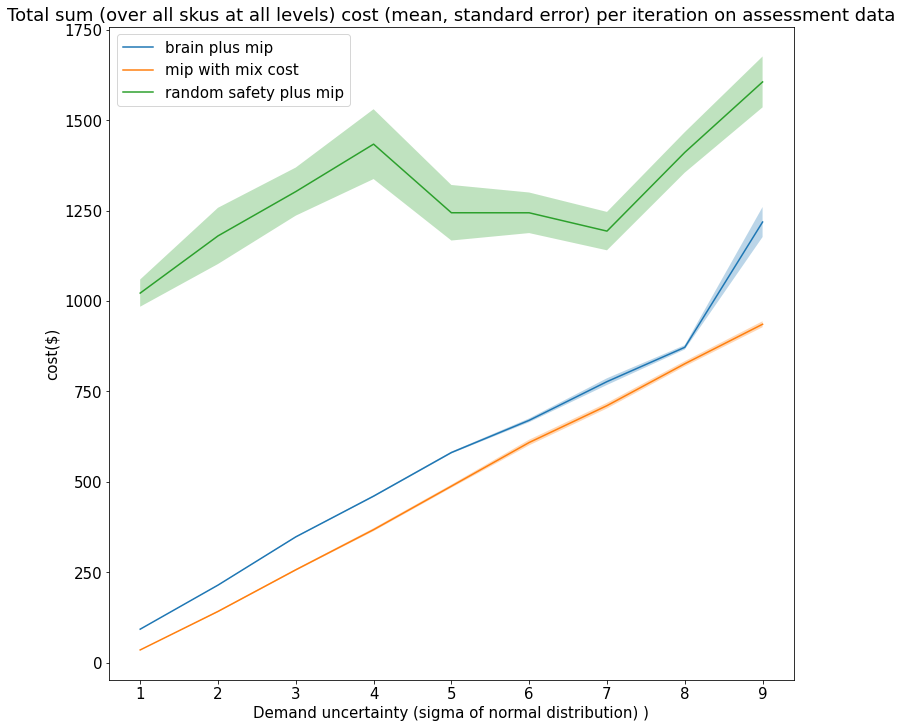

In [21]:
plt.rc('font', size=15)
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
mean_cost = df_brain.cost_mean
std_cost = df_brain.cost_std
sigmax = df_brain["sigmax"]
#print(sigmax)
#np.arange(len(mean_cost))
ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost, 
                alpha=0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='brain plus mip')
ax0.set_ylabel('cost($)',fontsize=15)
ax0.set_xlabel('Demand uncertainty (sigma of normal distribution) )', fontsize=15)
ax0.set_title('Total sum (over all skus at all levels) cost (mean, standard error) per iteration on assessment data', fontsize=18)
ax0.legend()


mean_cost = df_mipmix.cost_mean
std_cost = df_mipmix.cost_std
sigmax = df_mipmix["sigmax"]

ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost,
                alpha = 0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='mip with mix cost')
ax0.legend()


mean_cost = df_randomsafety.cost_mean
std_cost = df_randomsafety.cost_std
sigmax = df_randomsafety["sigmax"]

ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost,
                alpha = 0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='random safety plus mip')
ax0.legend()

## Conclusion
As shown in the results above, as cost ratio increases, the performance of brain plus mip shines as need for safety stock is essentail to navigate demand uncertainty. Also, as shown above random safety stock levels underperforms both mip and mip plus brain approach. 